In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import math
import controls as ctrl
import pandas as pd
import os

# Defining our constants (endowments)

In [2]:
original_task_endowments = ctrl.task_endowments
total_endowment = sum(original_task_endowments)
unique_task_endowments = list(set(ctrl.task_endowments))
unique_task_endowments.sort()

# defining tax rates
tax_rates = []
for i in range(0,11, 1):
    tax_rates.append(i/10)
tax_rates

# new parameters
optimal_taxes = [1, 0.85, 0.7, 0.55, 0.25, 0]
income_max_tax = 70
#income_max_tax = 38.7

unique_task_endowments

[9, 15, 25, 40, 80, 125]

# Defining the Payoff Functions

## Payoff Function

In [3]:
def quadratic_payoff(endowment, b, c, tax):
    """Quadratic payoff function for Money Politics
    
    y=income+b*t+c*t^2
    """
    
    return endowment+b*tax+(c/2)*(tax**2)

## Calculating C_{I}

In [4]:
list_of_Ci = []

index_counter = 0
for endowment in unique_task_endowments:
    print("endowment", endowment)
    print("income_max_tax - endowment = ", income_max_tax - endowment)
    print("optimal_tax = ", optimal_taxes[index_counter])
    print("1/2 - optimal_taxes[index_counter] = ", 1/2 - optimal_taxes[index_counter])
    Ci = (income_max_tax - endowment)/(1/2 - optimal_taxes[index_counter])
    print("Ci = ", Ci)
    list_of_Ci.append(Ci)
    index_counter += 1
    print("------------------------------")

list_of_Ci

endowment 9
income_max_tax - endowment =  61
optimal_tax =  1
1/2 - optimal_taxes[index_counter] =  -0.5
Ci =  -122.0
------------------------------
endowment 15
income_max_tax - endowment =  55
optimal_tax =  0.85
1/2 - optimal_taxes[index_counter] =  -0.35
Ci =  -157.14285714285714
------------------------------
endowment 25
income_max_tax - endowment =  45
optimal_tax =  0.7
1/2 - optimal_taxes[index_counter] =  -0.19999999999999996
Ci =  -225.00000000000006
------------------------------
endowment 40
income_max_tax - endowment =  30
optimal_tax =  0.55
1/2 - optimal_taxes[index_counter] =  -0.050000000000000044
Ci =  -599.9999999999994
------------------------------
endowment 80
income_max_tax - endowment =  -10
optimal_tax =  0.25
1/2 - optimal_taxes[index_counter] =  0.25
Ci =  -40.0
------------------------------
endowment 125
income_max_tax - endowment =  -55
optimal_tax =  0
1/2 - optimal_taxes[index_counter] =  0.5
Ci =  -110.0
------------------------------


[-122.0,
 -157.14285714285714,
 -225.00000000000006,
 -599.9999999999994,
 -40.0,
 -110.0]

## Calculating B_{I}

In [5]:
list_of_Bi = []

index_counter = 0
for endowment in unique_task_endowments:
    Bi = -list_of_Ci[index_counter]*optimal_taxes[index_counter]
    list_of_Bi.append(Bi)
    index_counter += 1

list_of_Bi

[122.0, 133.57142857142856, 157.50000000000003, 329.9999999999997, 10.0, 0.0]

# Obtaining Final Payoffs

In [6]:
final_payoffs = {}

endowment_index = 0
for endowment in unique_task_endowments:
    index = 0 # index for calling the private income/public contrib that corresponds to an specific tax rate
    
    final_payoffs[f"final_payoff_{endowment}"] = [] # list with all the final_payoffs for a player
    
    print("endowment = ", endowment)
    for tax_rate in tax_rates: # calculating all the final payoffs for an specific player
        print("tax rate = ", tax_rate)
        current_final_payoff = quadratic_payoff(endowment, list_of_Bi[endowment_index], list_of_Ci[endowment_index], tax_rate)
        print("current_final_payoff = ", current_final_payoff)
        final_payoffs[f"final_payoff_{endowment}"].append(round(current_final_payoff, 3))
        index += 1
        print("---")
        
    endowment_index += 1
    print("---------------------")
#final_payoffs

endowment =  9
tax rate =  0.0
current_final_payoff =  9.0
---
tax rate =  0.1
current_final_payoff =  20.590000000000003
---
tax rate =  0.2
current_final_payoff =  30.960000000000004
---
tax rate =  0.3
current_final_payoff =  40.11
---
tax rate =  0.4
current_final_payoff =  48.040000000000006
---
tax rate =  0.5
current_final_payoff =  54.75
---
tax rate =  0.6
current_final_payoff =  60.24
---
tax rate =  0.7
current_final_payoff =  64.50999999999999
---
tax rate =  0.8
current_final_payoff =  67.56
---
tax rate =  0.9
current_final_payoff =  69.38999999999999
---
tax rate =  1.0
current_final_payoff =  70.0
---
---------------------
endowment =  15
tax rate =  0.0
current_final_payoff =  15.0
---
tax rate =  0.1
current_final_payoff =  27.57142857142857
---
tax rate =  0.2
current_final_payoff =  38.57142857142856
---
tax rate =  0.3
current_final_payoff =  47.99999999999999
---
tax rate =  0.4
current_final_payoff =  55.85714285714285
---
tax rate =  0.5
current_final_payoff =  

# Plotting the functions

<IPython.core.display.Javascript object>


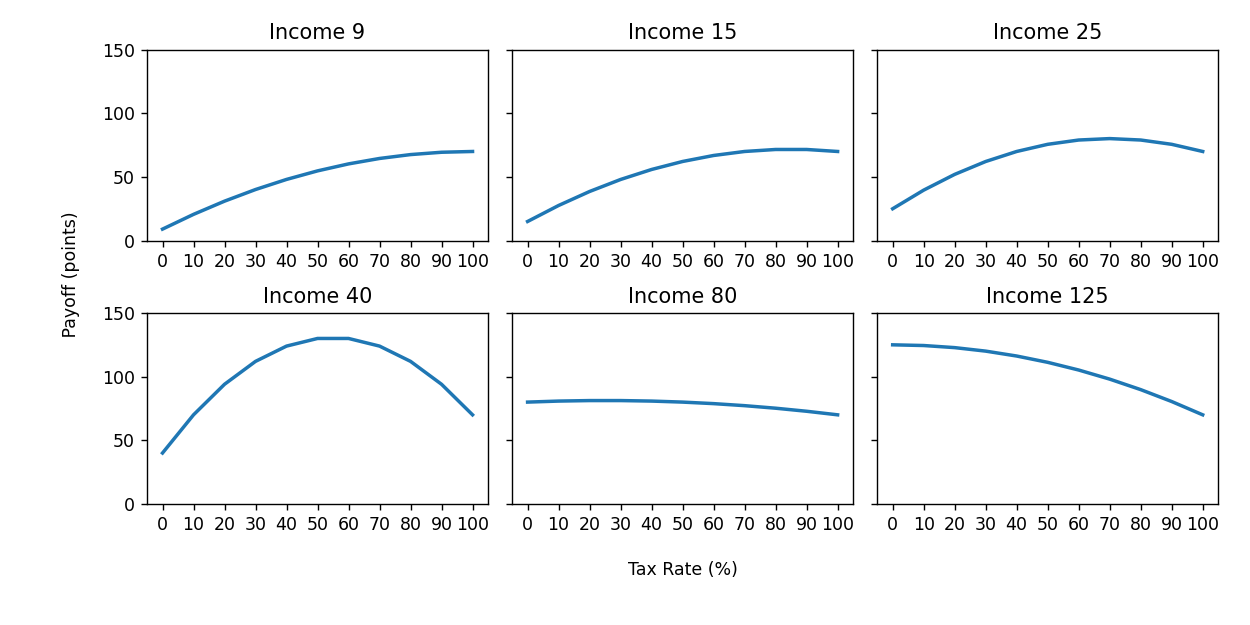

In [7]:
from matplotlib.figure import Figure

# creating a set of subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=False, sharey=True, figsize=(10, 5))

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)

axs = [ax1,ax2,ax3,ax4,ax5,ax6] # storing a subplot for each endowment level

# plotting all subplots
for n_axis in range(1, len(axs) + 1):
    task_endowment = unique_task_endowments[n_axis-1]
    xvals = [tax_rate*100 for tax_rate in tax_rates] # calling our tax rates for a progressivity level
    
    axs[n_axis-1].plot(xvals, final_payoffs[f"final_payoff_{task_endowment}"], linewidth = 2)
    
    axs[n_axis-1].set_ylim(0, 150) # setting the y axis limit from 0% to 100%
    axs[n_axis-1].set_title(f"Income {task_endowment}") # setting the title of each subplot as to their respective level   
    
# hiding big subplot tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.tight_layout(pad=1.0)

# stablishing the x and y titles
plt.xlabel("Tax Rate (%)")
plt.tick_params(axis='x', which='major', pad=15) # spacing between x-axis ticks and name
plt.ylabel(" Payoff (points)")
plt.tick_params(axis='y', which='major', pad=15) # spacing between y-axis ticks and name
#plt.title("Possible Incomes without messaging")

# # setting up the progressivity plots
plt.setp(axs, xticks=[tax_rate*100 for tax_rate in tax_rates], xticklabels=[round(tax_rate*100) for tax_rate in tax_rates]) 

fig.tight_layout(pad=1.0) # adding some spacing between subplots
fig.savefig('..\_static\MoneyPolitics\Income plots.png')

<IPython.core.display.Javascript object>


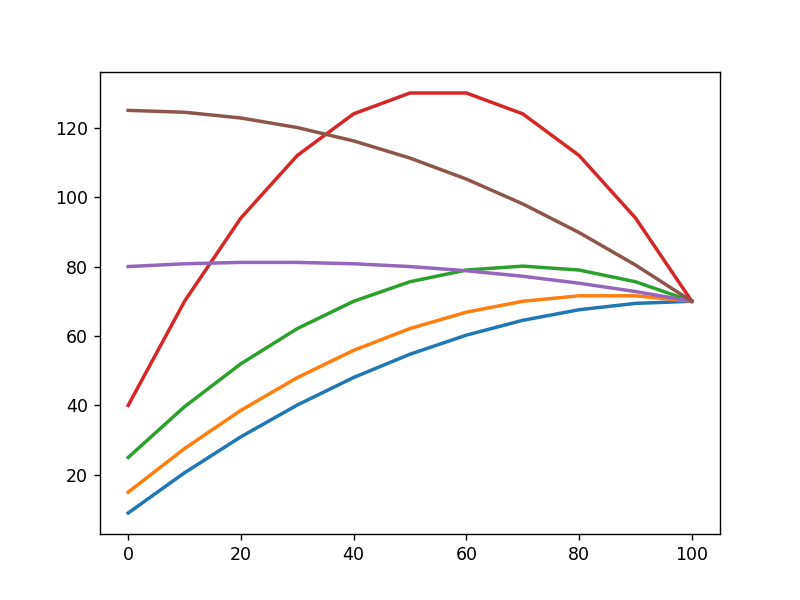

In [8]:
xvals = [tax_rate*100 for tax_rate in tax_rates] 

fig1, ax1 = plt.subplots()
plt.plot(xvals, final_payoffs[f"final_payoff_9"], linewidth = 2)
plt.plot(xvals, final_payoffs[f"final_payoff_15"], linewidth = 2)
plt.plot(xvals, final_payoffs[f"final_payoff_25"], linewidth = 2)
plt.plot(xvals, final_payoffs[f"final_payoff_40"], linewidth = 2)
plt.plot(xvals, final_payoffs[f"final_payoff_80"], linewidth = 2)
plt.plot(xvals, final_payoffs[f"final_payoff_125"], linewidth = 2)
plt.show()